In [3]:

import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Importing supplementary visualizations code visuals.py
import visuals as vs

%matplotlib inline

# Loading the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    

print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [4]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Showing the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


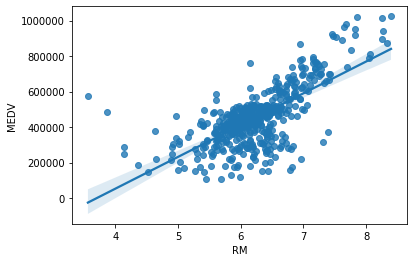

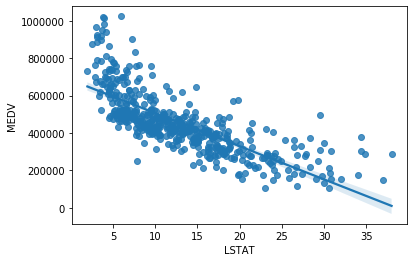

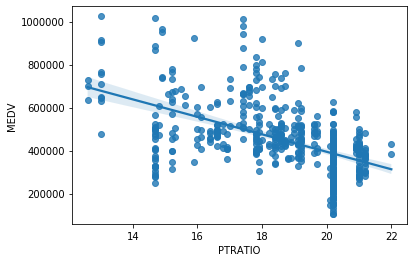

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(x=data[var],y=prices)
    plt.show()

In [6]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true,y_predict)
    
    # Returning the score
    return score

In [8]:
 #Calculating the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [9]:
from sklearn.model_selection import train_test_split

# Shuffling and spliting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=100)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


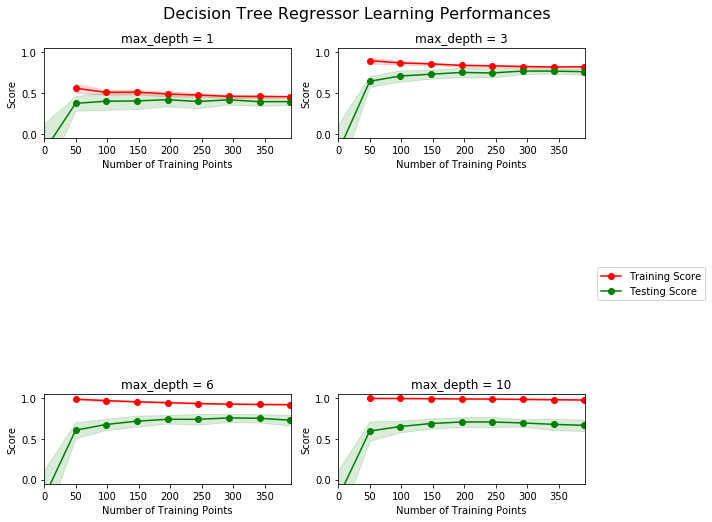

In [10]:
# Producing learning curves for varying training set sizes and maximum depths
import warnings
warnings.filterwarnings("ignore")  # suppress warnings
vs.ModelLearning(features, prices) 

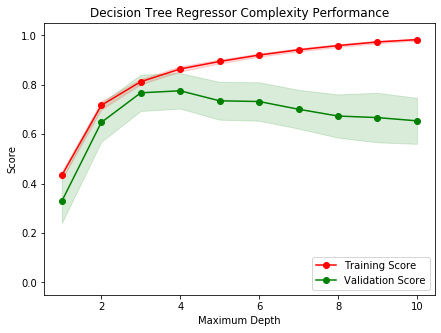

In [11]:
vs.ModelComplexity(X_train, y_train)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Creating cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()
    params = {'max_depth': range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)
    grid = grid.fit(X, y)

    # Returning the optimal model after fitting the data
    return grid.best_estimator_

In [13]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [14]:
# Producing a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Showing predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $401,333.33
Predicted selling price for Client 2's home: $240,947.37
Predicted selling price for Client 3's home: $893,700.00
